In [1]:
import keras
import seaborn as sns
import tensorflow as tf
from keras.models import Model
from keras.models import load_model
from keras import backend as K
from keras.layers import Activation
from keras.callbacks import ModelCheckpoint
from keras.layers.core import Dense,Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import *
from sklearn import metrics
import math
import numpy as np
from sklearn.metrics import confusion_matrix
import math
import numpy as np
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = np.load('/content/drive/MyDrive/face_train_embed.npz')
Xtrain, ytrain = data['arr_0'], data['arr_1']
data = np.load('/content/drive/MyDrive/face_test_embed.npz')
Xtest, ytest = data['arr_0'], data['arr_1']
print('Dataset: train=%d, test=%d' % (Xtrain.shape[0], Xtest.shape[0]))

Dataset: train=3491, test=6724


In [5]:
n = Normalizer(norm='l2')
trainX = n.transform(Xtrain)
testX = n.transform(Xtest)

In [6]:
out = LabelEncoder()
out.fit(ytrain)
trainy = out.transform(ytrain)
testy = out.transform(ytest)

In [7]:
model = SVC(kernel='linear')
model.fit(trainX, trainy)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
yhat_test = model.predict(testX)
yhat_train = model.predict(trainX)
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=98.826, test=79.432


In [10]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(testy, yhat_test),["origianl","spoof"]) 

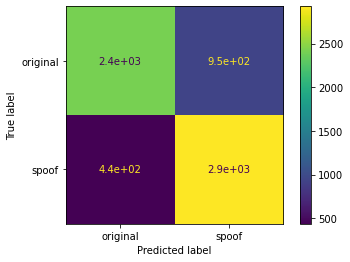

In [ ]:
metrics.plot_confusion_matrix(model,testX,testy)

In [ ]:
print(metrics.classification_report(testy,yhat_test , target_names=["original","spoof"]))


              precision    recall  f1-score   support

    original       0.85      0.72      0.78      3362
       spoof       0.76      0.87      0.81      3362

    accuracy                           0.79      6724
   macro avg       0.80      0.79      0.79      6724
weighted avg       0.80      0.79      0.79      6724

